In [224]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage
from skimage.measure import find_contours
from skimage.transform import resize, rescale
from skimage.io import imread
from skimage.color import rgb2gray
import os

(1558, 1200, 3)
1200
<class 'numpy.ndarray'>
[[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]]


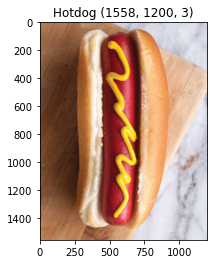

In [231]:
image = imread('data/train/hotdog/1.jpeg')
print(image.shape)
plt.imshow(image)
plt.title('Hotdog (1558, 1200, 3)')
print(len(image[0]))
print(type(image))

print(np.array([[[1,2,3], [4,5,6]], [[1,2,3], [4,5,6]]]))



[[0.45189922 0.46758549 0.4911149  ... 0.83002549 0.82218235 0.81826078]
 [0.45974235 0.47150706 0.4911149  ... 0.83394706 0.83002549 0.82610392]
 [0.47542863 0.48327176 0.49895804 ... 0.84571176 0.8417902  0.8417902 ]
 ...
 [0.55945608 0.55945608 0.55945608 ... 0.83926039 0.83926039 0.83926039]
 [0.55945608 0.55945608 0.55945608 ... 0.83926039 0.83926039 0.83926039]
 [0.55945608 0.55945608 0.55945608 ... 0.83926039 0.83926039 0.83926039]]


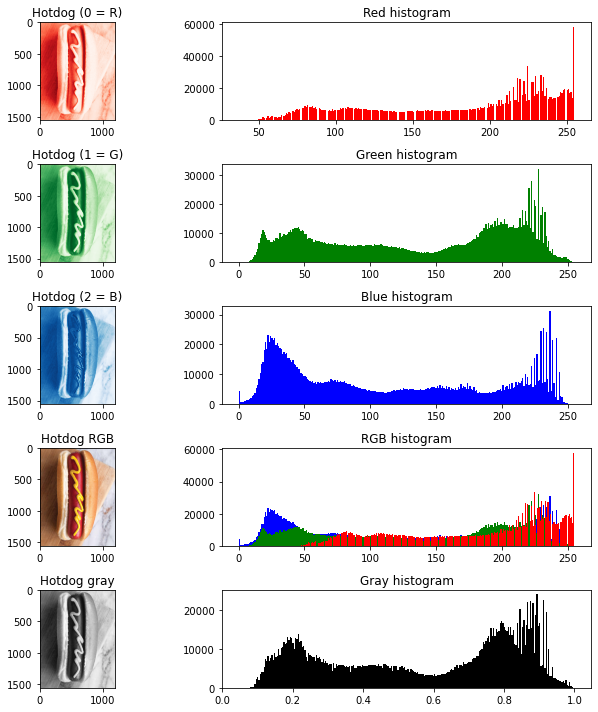

In [232]:
# image shape (550, 800, 3)
red   = image[:, :, 0]
green = image[:, :, 1]
blue  = image[:, :, 2]

fig, ax = plt.subplots(5,2, figsize=(10, 10))
ax[0][0].imshow(red, cmap='Reds_r')
ax[0][0].set_title('Hotdog (0 = R)')

ax[0][1].hist(red.ravel(), bins=256, color='red')
ax[0][1].set_title('Red histogram')

ax[1][0].imshow(green, cmap='Greens_r')
ax[1][0].set_title('Hotdog (1 = G)')

ax[1][1].hist(green.ravel(), bins=256, color='green')
ax[1][1].set_title('Green histogram')

ax[2][0].imshow(blue, cmap='Blues_r')
ax[2][0].set_title('Hotdog (2 = B)')

ax[2][1].hist(blue.ravel(), bins=256, color='blue')
ax[2][1].set_title('Blue histogram')

ax[3][0].imshow(image)
ax[3][0].set_title('Hotdog RGB')

ax[3][1].hist(blue.ravel(), bins=256, color='blue')
ax[3][1].hist(green.ravel(), bins=256, color='green')
ax[3][1].hist(red.ravel(), bins=256, color='red')
ax[3][1].set_title('RGB histogram')

gray = rgb2gray(image)
print(gray)
ax[4][0].imshow(gray, cmap='gray')
ax[4][0].set_title('Hotdog gray')
ax[4][1].hist(gray.ravel(), bins=256, color='black')
ax[4][1].set_title('Gray histogram')

plt.tight_layout()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


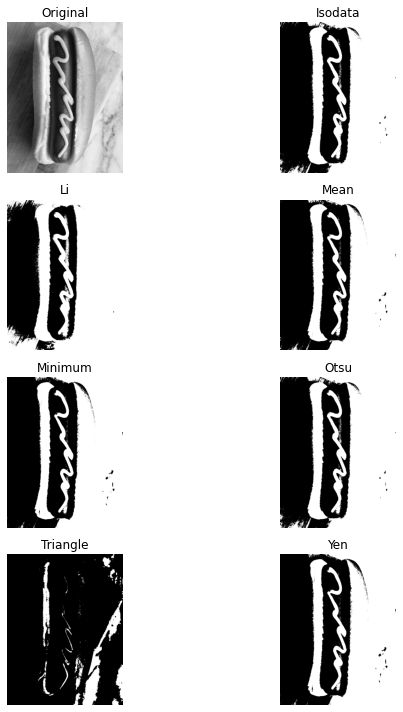

In [233]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(gray, figsize=(10,10))

0.46380698188286595
- threshold_li
1: 1134775
0: 734825
- threshold_otsu
1: 1028236
0: 841364


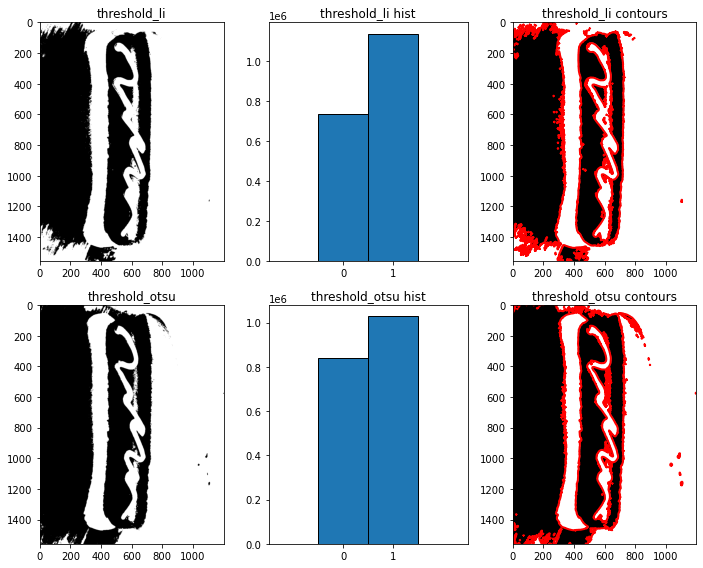

In [234]:
from skimage.filters import threshold_li, threshold_otsu
from skimage.restoration import denoise_tv_chambolle
from skimage.measure import find_contours

def plot_contours(img, i, j, name):
    ax[i][j].imshow(img, cmap='gray')
    contours = find_contours(img)
    for contour in contours:
        ax[i][j].plot(contour[:, 1], contour[:, 0], linewidth=2, color="red")

    ax[i][j].set_title(name + ' contours')

denoised = denoise_tv_chambolle(image, channel_axis=True)
gray = rgb2gray(denoised)

li = threshold_li(gray)
print(li)
li_img =  (gray > li).astype(int)

print("- threshold_li")
print(f'1: {np.count_nonzero(li_img == 1)}')
print(f'0: {np.count_nonzero(li_img == 0)}')

otsu = threshold_otsu(gray)
otsu_img =  (gray > otsu).astype(int)
fig, ax = plt.subplots(2,3, figsize=(10,8))

print("- threshold_otsu")
print(f'1: {np.count_nonzero(otsu_img == 1)}')
print(f'0: {np.count_nonzero(otsu_img == 0)}')

ax[0][0].imshow(li_img, cmap='gray')
ax[0][0].set_title('threshold_li')
ax[0][1].hist(li_img.ravel(), 2, edgecolor='black')
ax[0][1].set_xticks([0.25,0.75], [0,1])
ax[0][1].set_xlim([-0.5,1.5])
ax[0][1].set_title('threshold_li hist')
plot_contours(li_img, 0, 2, 'threshold_li')

ax[1][0].imshow(otsu_img, cmap='gray')
ax[1][0].set_title('threshold_otsu')
ax[1][1].hist(otsu_img.ravel(), 2, edgecolor='black')
ax[1][1].set_xticks([0.25,0.75], [0,1])
ax[1][1].set_xlim([-0.5,1.5])
ax[1][1].set_title('threshold_otsu hist')
plot_contours(otsu_img, 1, 2, 'threshold_otsu')

plt.tight_layout()




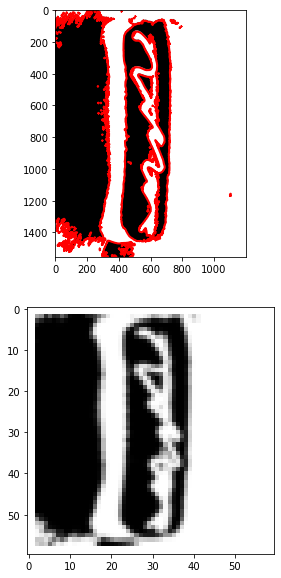

In [236]:
def final(img):

    fig, ax = plt.subplots(2, figsize=(10,10))

    ax[0].imshow(img, cmap='gray') # original
    contours = find_contours(img)
    x_min, y_min = img.shape[1], img.shape[0]
    x_max = y_max = 0
    for contour in contours:
        x = contour[:, 1]
        y = contour[:, 0]
        ax[0].plot(x, y, linewidth=2, color="red")
        x_min = min(x_min, x.min())
        x_max = max(x_max, x.max())
        y_min = min(y_min, y.min())
        y_max = max(y_max, y.max())

    xmin = int(x_min)
    ymin = int(y_min)
    xmax = int(x_max + .9)
    ymax = int(y_max + .9)
    cropped = img[ymin:ymax, xmin:xmax]
    resized = resize(cropped, (60, 60), mode='constant', cval=1)

    ax[1].imshow(resized, cmap='gray') # original


final(li_img)